In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the csv file
file_path = "E:\\Portfolio_projects\\Python\\World_Happiness\\2019.csv"
happiness_data = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print(happiness_data.info())

# Display the first few rows of the dataset
print(happiness_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall rank               156 non-null    int64  
 1   Country or region          156 non-null    object 
 2   Score                      156 non-null    float64
 3   GDP per capita             156 non-null    float64
 4   Social support             156 non-null    float64
 5   Healthy life expectancy    156 non-null    float64
 6   Freedom                    156 non-null    float64
 7   Generosity                 156 non-null    float64
 8   Perceptions of corruption  156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383    

In [4]:
# Display summary statistics for numeric columns
print(happiness_data.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy     Freedom  Generosity  \
count               156.000000  156.000000  156.000000   
mean                  0.725244    0.392571    0.184846   
std                   0.242124    0.143289    0.095254   
min                   0.000000    0.000000    0.000000   
25%                   0.547750    0.308000    0.108750   
50%                   0.789000    0.417000    0.

In [5]:
# Check for missing values
print(happiness_data.isnull().sum())

# Handle missing values (if any)
# Example: happiness_data = happiness_data.dropna()

Overall rank                 0
Country or region            0
Score                        0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64


In [6]:
# Top 10 countries with the highest happiness scores
top_countries = happiness_data.nlargest(10, 'Score')
print("Top 10 Countries with the Highest Happiness Scores:")
print(top_countries[['Country or region', 'Score']])

# Bottom 10 countries with the lowest happiness scores
bottom_countries = happiness_data.nsmallest(10, 'Score')
print("\nBottom 10 Countries with the Lowest Happiness Scores:")
print(bottom_countries[['Country or region', 'Score']])

Top 10 Countries with the Highest Happiness Scores:
  Country or region  Score
0           Finland  7.769
1           Denmark  7.600
2            Norway  7.554
3           Iceland  7.494
4       Netherlands  7.488
5       Switzerland  7.480
6            Sweden  7.343
7       New Zealand  7.307
8            Canada  7.278
9           Austria  7.246

Bottom 10 Countries with the Lowest Happiness Scores:
            Country or region  Score
155               South Sudan  2.853
154  Central African Republic  3.083
153               Afghanistan  3.203
152                  Tanzania  3.231
151                    Rwanda  3.334
150                     Yemen  3.380
149                    Malawi  3.410
148                     Syria  3.462
147                  Botswana  3.488
146                     Haiti  3.597


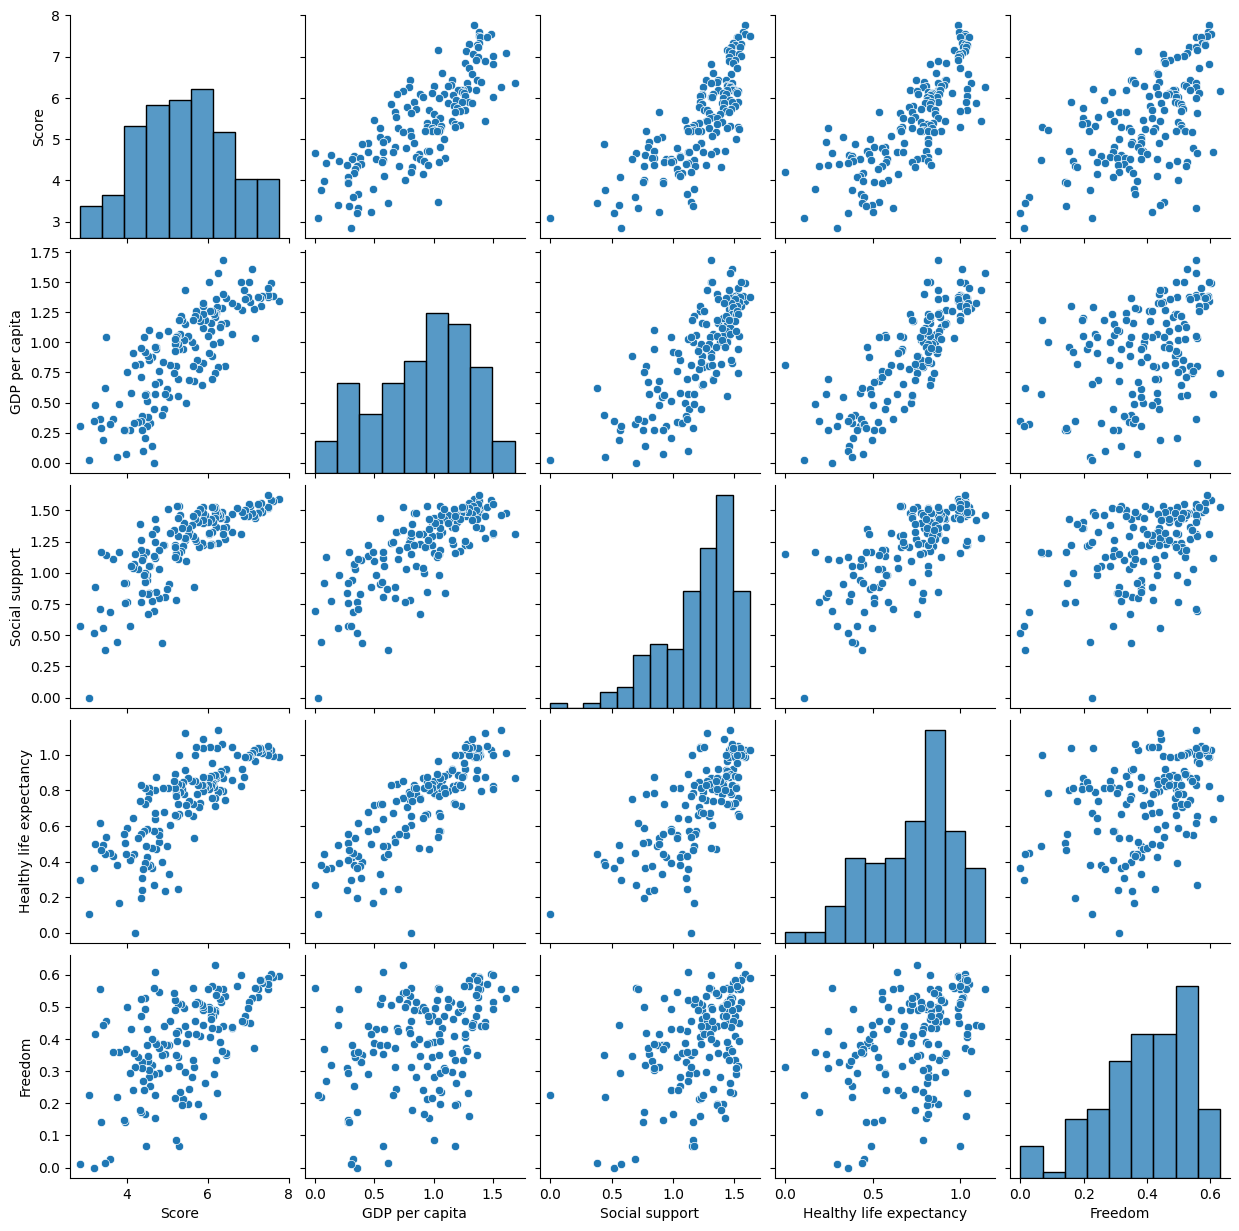

In [7]:
# Pairplot for correlation analysis
sns.pairplot(happiness_data[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom']])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1784\4046413348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = happiness_data.corr()


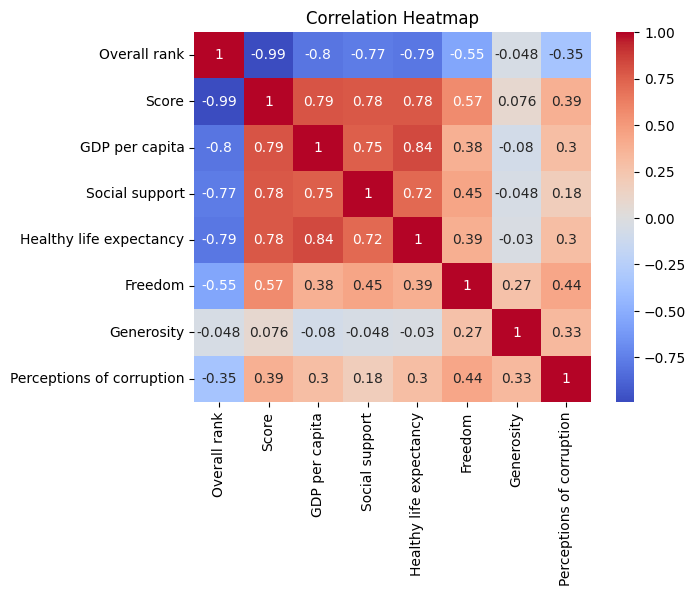

In [8]:
# Correlation heatmap
correlation_matrix = happiness_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

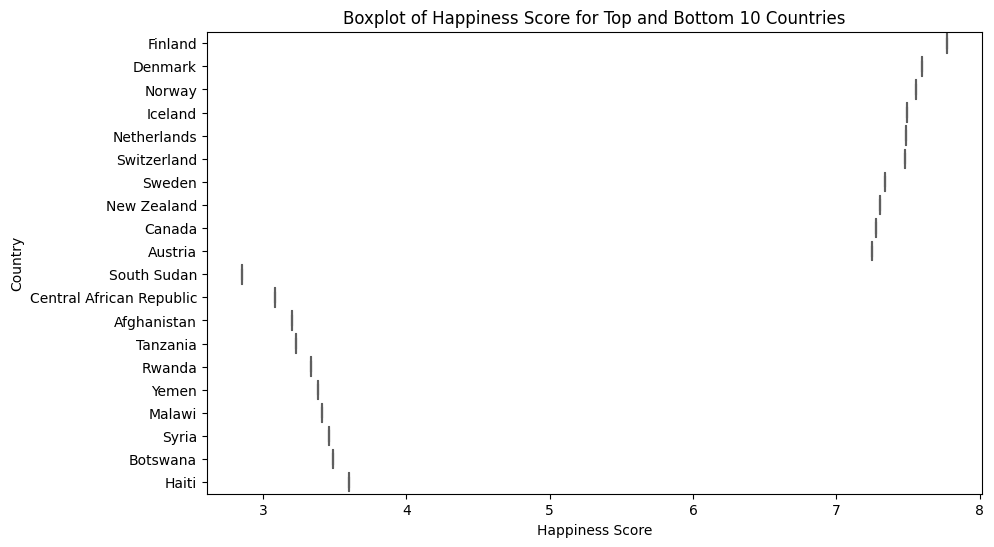

In [16]:
# Identify the top and bottom 10 countries by Happiness Score
top_10_countries = happiness_data.nlargest(10, 'Score')
bottom_10_countries = happiness_data.nsmallest(10, 'Score')

# Concatenate the data for the boxplot
top_bottom_10_countries = pd.concat([top_10_countries, bottom_10_countries])

# Boxplot for Score for Top and Bottom 10 Countries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Country or region', data=top_bottom_10_countries, palette="Set3")
plt.title('Boxplot of Happiness Score for Top and Bottom 10 Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


####
This box plot contains top 10 and bottom 10 countries based on happiness score, respectively. We can see the furhter to the right the whisker is the happier the country ranks and vice versa.

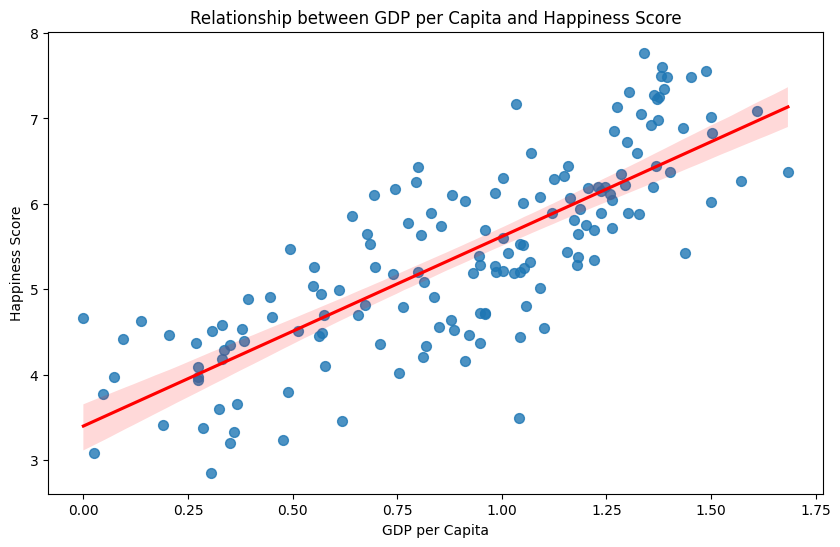

In [12]:
# Scatter plot with trend line for GDP per Capita vs Happiness Score
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita', y='Score', data=happiness_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


In [13]:
# Calculate the correlation coefficient between GDP per Capita and Happiness Score
correlation_coefficient = happiness_data['GDP per capita'].corr(happiness_data['Score'])

print(f'Correlation Coefficient: {correlation_coefficient:.2f}')


Correlation Coefficient: 0.79


#### 
The correlation coefficient between GDP per Capita and Happiness Score is 0.79. This value indicates the strength of the linear relationship between the two variables. If the correlation coefficient value is closer or equal to 1, it is known as positive correlation which suggests that as GDP per Capita increases, the Happiness Score tends to increase.


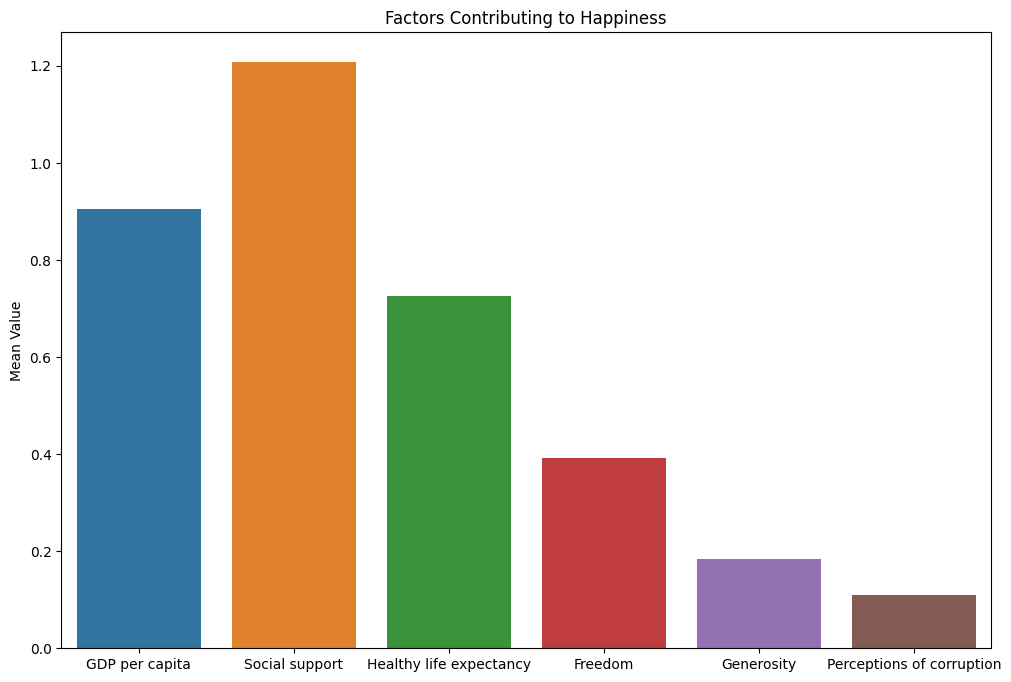

In [11]:
# Bar plot for factors contributing to happiness
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(12, 8))
sns.barplot(x=factors, y=happiness_data[factors].mean())
plt.title('Factors Contributing to Happiness')
plt.ylabel('Mean Value')
plt.show()

####
Limitations:
- Correlation does not imply causation.
- Other unobserved factors may contribute to happiness scores.
- The analysis is based on a single year's data (2019).
